In [23]:
import os
import skimage
import skimage.data
import numpy as np

In [24]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [25]:
ROOT_PATH = "../data/"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

print(train_data_directory)

../data/Training


In [26]:
images, labels = load_data(train_data_directory)

In [28]:
img_array = np.asarray(images)
print(len(img_array))

4575


In [30]:
labels_array = np.asarray(labels)

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
62


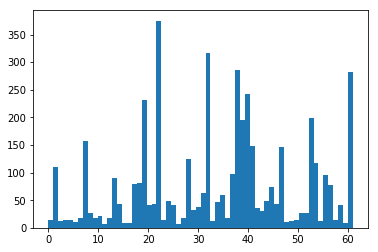

In [31]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels_array, 62)

# Show the plot
plt.show()

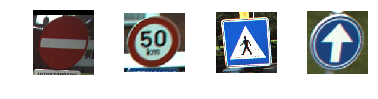

In [32]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

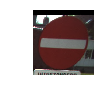

shape: (211, 199, 3), min: 0, max: 255


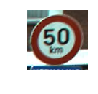

shape: (82, 84, 3), min: 0, max: 255


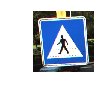

shape: (223, 223, 3), min: 0, max: 255


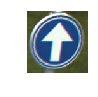

shape: (98, 96, 3), min: 7, max: 255


In [33]:
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

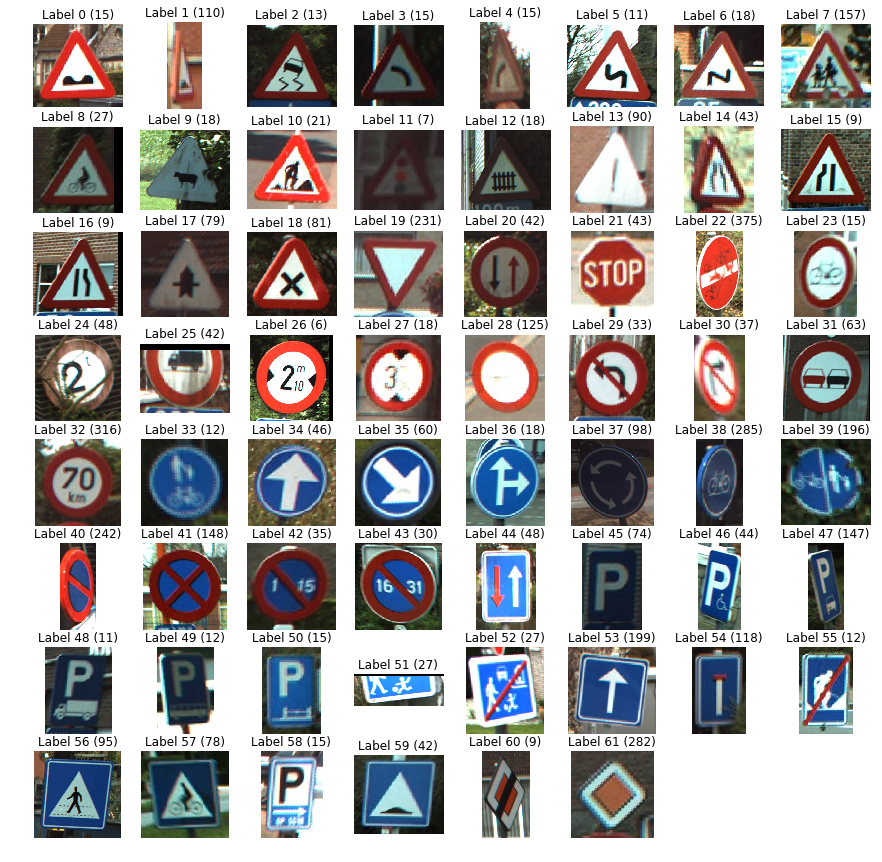

In [34]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [35]:
# Rescaling Images

# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

/home/talat/anaconda/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


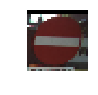

shape: (28, 28, 3), min: 0.0, max: 1.0


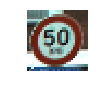

shape: (28, 28, 3), min: 0.006302521008404462, max: 1.0


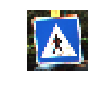

shape: (28, 28, 3), min: 0.026628151260503077, max: 1.0


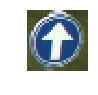

shape: (28, 28, 3), min: 0.05252100840336304, max: 1.0


In [37]:
# Plot the rescaled images
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

In [38]:
# Converting to gray scale - Not required for classification process

# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

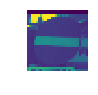

shape: (28, 28), min: 0.0, max: 1.0


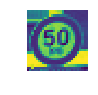

shape: (28, 28), min: 0.06295415966386525, max: 1.0


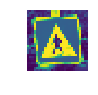

shape: (28, 28), min: 0.0503716860494195, max: 1.0


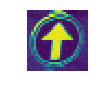

shape: (28, 28), min: 0.21331186274509675, max: 0.9990735364145655


In [39]:
# Plot the rescaled images
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

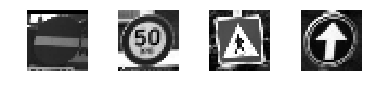

In [43]:
#Actual Grayscale images, with cmap given as "gray"

import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

# Modeling the Neural Network

In [46]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [47]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_2:0", shape=(?,), dtype=int64)


In [52]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
    _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)

Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape

[40, 32, 43, 38, 19, 13, 61, 38, 44, 22]
[40 32 41 38 19 13 61 38 44 22]


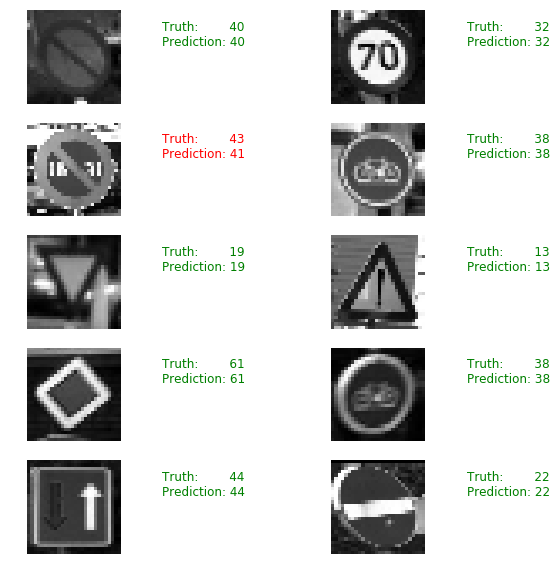

In [53]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [54]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/home/talat/anaconda/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.635
